# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!pip3 install tensorflow

# Environment
moved to [./environment.py](./environment.py)

In [3]:
from environment import EnvBlabla

# Agents
Finished agents are moved to [./agents.py](./agents.py)

In [4]:
from agents import RandomAgent, EpsilonGreedy, RandomAgentWithHist, LinearRegressionAgent, LinearRegressionAgentOhe, LinearRegressionAgentOheOnline, DeepLearningAgentWithEmbedding, DeepLearningAgentWithoutEmbedding

Using TensorFlow backend.


# Experiments

In [5]:
nb_exp = 100
nb_steps = 100
#% Use 30% of the steps as history because why not
nb_steps_hist = int(0.3 * nb_steps)
nb_trips = 20
nb_users = 5

Experiment functions have been moved to [./experiments.py](./experiments.py)

In [6]:
from experiments import run_exp_with_hist, run_exp

## Environment trip accept rate
Let's check that with the given environment probabilities, we can still have valid trips for each step in average.

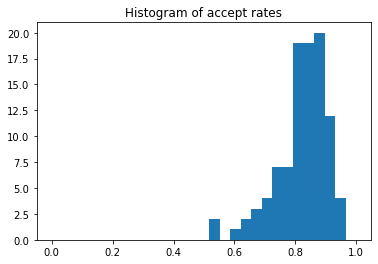

In [7]:
import numpy as np

rates = []
for seed in range(nb_exp):
    env = EnvBlabla(nb_users=nb_users, nb_trips=nb_trips, seed=seed)
    state = env.reset()

    acc = []

    for i in range(nb_steps):
        c = 0
        for trip in env.trips:
            if(env.user.accepts_trip(trip)):
                c += 1
        acc.append(c / float(nb_trips))
        env.step(0)
    rates.append(np.mean(acc))
plt.hist(rates, bins=np.linspace(0, 1, 30))
plt.title('Histogram of accept rates')
plt.show()

# Agents tests
## Without history

### Random Agent

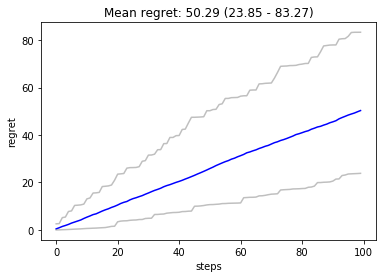

In [8]:
regretR = np.zeros(nb_exp)
regretsR = np.zeros((nb_exp, nb_steps))
for i in range(nb_exp):
    env = EnvBlabla(nb_users=nb_users, nb_trips=nb_trips, seed=i)
    agent = RandomAgent(seed=i)
    exp = run_exp(agent, env, nb_steps)
    regretR[i] = exp['regret']
    regretsR[i] = exp['cum_regrets']

plt.plot(regretsR.mean(axis=0), color='blue')
plt.plot(np.quantile(regretsR, 0.05,axis=0), color='grey', alpha=0.5)
plt.plot(np.quantile(regretsR, 0.95,axis=0), color='grey', alpha=0.5)
plt.title('Mean regret: {:.2f} ({:.2f} - {:.2f})'.format(regretR.mean(), np.quantile(regretR, 0.05), np.quantile(regretR, 0.95)))
plt.xlabel('steps')
plt.ylabel('regret')
plt.show()

### Epsilon Greedy

Will not work because context-related features are not taken into account and context is fully generated (context[0] changes between iterations).

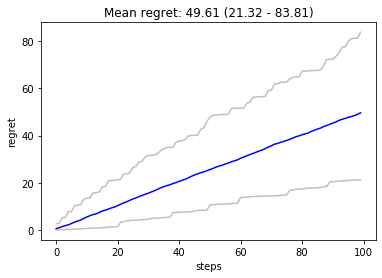

In [9]:
regretE = np.zeros(nb_exp)
regretsE = np.zeros((nb_exp, nb_steps))
for i in range(nb_exp):
    env = EnvBlabla(nb_users=nb_users, nb_trips=nb_trips, seed=i)
    agent = EpsilonGreedy(context = env.reset(),seed=i)
    exp = run_exp(agent, env, nb_steps)
    regretE[i] = exp['regret'] 
    regretsE[i] = exp['cum_regrets']
    
plt.plot(regretsE.mean(axis=0), color='blue')
plt.plot(np.quantile(regretsE, 0.05,axis=0), color='grey', alpha=0.5)
plt.plot(np.quantile(regretsE, 0.95,axis=0), color='grey', alpha=0.5)
plt.title('Mean regret: {:.2f} ({:.2f} - {:.2f})'.format(regretE.mean(), np.quantile(regretE, 0.05), np.quantile(regretE, 0.95)))
plt.xlabel('steps')
plt.ylabel('regret')
plt.show()

## With history

### Random
Used for benchmarking and testing cells

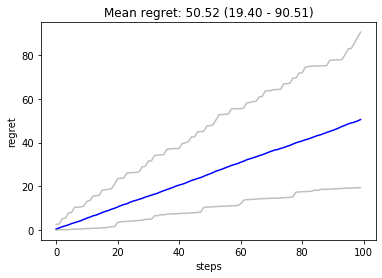

In [10]:
regretR2 = np.zeros(nb_exp)
regretsR2 = np.zeros((nb_exp, nb_steps))
for i in range(nb_exp):
    env = EnvBlabla(nb_users=nb_users, nb_trips=nb_trips, seed=i)
    agent_1 = RandomAgent(seed=i)
    agent_h = RandomAgentWithHist(seed=i)
    exp = run_exp_with_hist(agent_1, agent_h, env, nb_steps, nb_steps_hist)
    regretR2[i] = exp['regret'] 
    regretsR2[i] = exp['cum_regrets']
    
plt.plot(regretsR2.mean(axis=0), color='blue')
plt.plot(np.quantile(regretsR2, 0.05,axis=0), color='grey', alpha=0.5)
plt.plot(np.quantile(regretsR2, 0.95,axis=0), color='grey', alpha=0.5)
plt.title('Mean regret: {:.2f} ({:.2f} - {:.2f})'.format(regretR2.mean(), np.quantile(regretR2, 0.05), np.quantile(regretR2, 0.95)))
plt.xlabel('steps')
plt.ylabel('regret')
plt.show()

### Linear regression

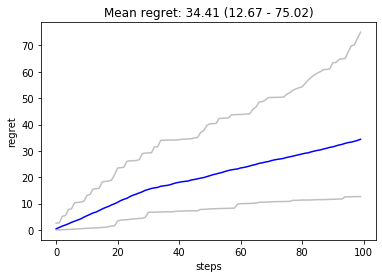

In [11]:
regretLR = np.zeros(nb_exp)
regretsLR = np.zeros((nb_exp, nb_steps))
for i in range(nb_exp):
    env = EnvBlabla(nb_users=nb_users, nb_trips=nb_trips, seed=i)
    agent_1 = RandomAgent(seed=i)
    agent_h = LinearRegressionAgent(seed=i)
    exp = run_exp_with_hist(agent_1, agent_h, env, nb_steps, nb_steps_hist)
    regretLR[i] = exp['regret'] 
    regretsLR[i] = exp['cum_regrets']

plt.plot(regretsLR.mean(axis=0), color='blue')
plt.plot(np.quantile(regretsLR, 0.05,axis=0), color='grey', alpha=0.5)
plt.plot(np.quantile(regretsLR, 0.95,axis=0), color='grey', alpha=0.5)
plt.title('Mean regret: {:.2f} ({:.2f} - {:.2f})'.format(regretLR.mean(), np.quantile(regretLR, 0.05), np.quantile(regretLR, 0.95)))
plt.xlabel('steps')
plt.ylabel('regret')
plt.show()

### With One hot encoder

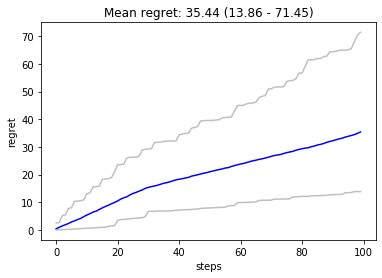

In [12]:
regretLRO = np.zeros(nb_exp)
regretsLRO = np.zeros((nb_exp, nb_steps))
for i in range(nb_exp):
    env = EnvBlabla(nb_users=nb_users, nb_trips=nb_trips, seed=i)
    agent_1 = RandomAgent(seed=i)
    agent_h = LinearRegressionAgentOhe(seed=i)
    exp = run_exp_with_hist(agent_1, agent_h, env, nb_steps, nb_steps_hist)
    regretLRO[i] = exp['regret'] 
    regretsLRO[i] = exp['cum_regrets']

plt.plot(regretsLRO.mean(axis=0), color='blue')
plt.plot(np.quantile(regretsLRO, 0.05,axis=0), color='grey', alpha=0.5)
plt.plot(np.quantile(regretsLRO, 0.95,axis=0), color='grey', alpha=0.5)
plt.title('Mean regret: {:.2f} ({:.2f} - {:.2f})'.format(regretLRO.mean(), np.quantile(regretLRO, 0.05), np.quantile(regretLRO, 0.95)))
plt.xlabel('steps')
plt.ylabel('regret')
plt.show()

## Deep learning agents

### Without embedding

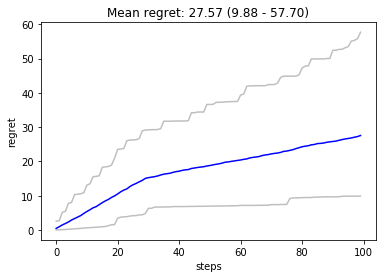

In [13]:
regretD = np.zeros(nb_exp)
regretsD = np.zeros((nb_exp, nb_steps))
for i in range(nb_exp):
    env = EnvBlabla(nb_users=nb_users, nb_trips=nb_trips, seed=i)
    agent_1 = RandomAgent(seed=i)
    agent_h = DeepLearningAgentWithoutEmbedding(seed=i, layers_cells=[256,256,256,256,256,256])
    exp = run_exp_with_hist(agent_1, agent_h, env, nb_steps, nb_steps_hist)
    regretD[i] = exp['regret'] 
    regretsD[i] = exp['cum_regrets']
    
plt.plot(regretsD.mean(axis=0), color='blue')
plt.plot(np.quantile(regretsD, 0.05,axis=0), color='grey', alpha=0.5)
plt.plot(np.quantile(regretsD, 0.95,axis=0), color='grey', alpha=0.5)
plt.title('Mean regret: {:.2f} ({:.2f} - {:.2f})'.format(regretD.mean(), np.quantile(regretD, 0.05), np.quantile(regretD, 0.95)))
plt.xlabel('steps')
plt.ylabel('regret')
plt.show()

### With embedding

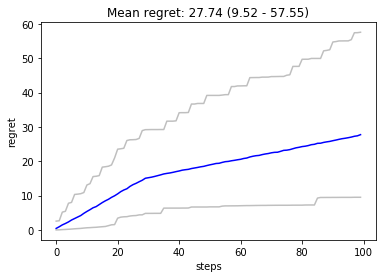

In [19]:
regretDE = np.zeros(nb_exp)
regretsDE = np.zeros((nb_exp, nb_steps))
for i in range(nb_exp):
    env = EnvBlabla(nb_users=nb_users, nb_trips=nb_trips, seed=i)
    agent_1 = RandomAgent(seed=i)
    agent_h = DeepLearningAgentWithEmbedding(seed=i, embedding_size=10, max_user_id=nb_users)
    exp = run_exp_with_hist(agent_1, agent_h, env, nb_steps, nb_steps_hist)
    regretDE[i] = exp['regret'] 
    regretsDE[i] = exp['cum_regrets']

plt.plot(regretsDE.mean(axis=0), color='blue')
plt.plot(np.quantile(regretsDE, 0.05,axis=0), color='grey', alpha=0.5)
plt.plot(np.quantile(regretsDE, 0.95,axis=0), color='grey', alpha=0.5)
plt.title('Mean regret: {:.2f} ({:.2f} - {:.2f})'.format(regretDE.mean(), np.quantile(regretDE, 0.05), np.quantile(regretDE, 0.95)))
plt.xlabel('steps')
plt.ylabel('regret')
plt.show()

#% The resulting error is given by the use of dense numpy array as inputs of the NN.
#% To remove these, we should cast these into tf variables https://stackoverflow.com/questions/35892412/tensorflow-dense-gradient-explanation

## Online learning with Linear regression

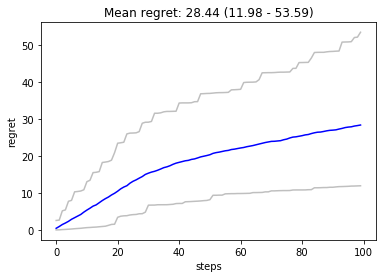

In [15]:
regretOLRO = np.zeros(nb_exp)
regretsOLRO = np.zeros((nb_exp, nb_steps))
for i in range(nb_exp):
    env = EnvBlabla(nb_users=nb_users, nb_trips=nb_trips, seed=i)
    agent_1 = RandomAgent(seed=i)
    agent_h = LinearRegressionAgentOheOnline(seed=i)
    exp = run_exp_with_hist(agent_1, agent_h, env, nb_steps, nb_steps_hist)
    regretOLRO[i] = exp['regret'] 
    regretsOLRO[i] = exp['cum_regrets']

plt.plot(regretsOLRO.mean(axis=0), color='blue')
plt.plot(np.quantile(regretsOLRO, 0.05,axis=0), color='grey', alpha=0.5)
plt.plot(np.quantile(regretsOLRO, 0.95,axis=0), color='grey', alpha=0.5)
plt.title('Mean regret: {:.2f} ({:.2f} - {:.2f})'.format(regretOLRO.mean(), np.quantile(regretOLRO, 0.05), np.quantile(regretOLRO, 0.95)))
plt.xlabel('steps')
plt.ylabel('regret')
plt.show()

# Agents comparison

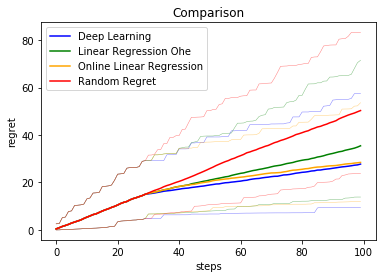

In [22]:
p1 = plt.plot(regretsDE.mean(axis=0), color='blue', label="Deep Learning")
plt.plot(np.quantile(regretsDE, 0.05,axis=0), color='blue', linewidth=0.5, alpha=0.5)
plt.plot(np.quantile(regretsDE, 0.95,axis=0), color='blue', linewidth=0.5, alpha=0.5)

p2 = plt.plot(regretsLRO.mean(axis=0), color='green', label="Linear Regression Ohe")
plt.plot(np.quantile(regretsLRO, 0.05,axis=0), color='green', linewidth=0.5, alpha=0.5)
plt.plot(np.quantile(regretsLRO, 0.95,axis=0), color='green', linewidth=0.5, alpha=0.5)

p2 = plt.plot(regretsOLRO.mean(axis=0), color='orange', label="Online Linear Regression")
plt.plot(np.quantile(regretsOLRO, 0.05,axis=0), color='orange', linewidth=0.5, alpha=0.5)
plt.plot(np.quantile(regretsOLRO, 0.95,axis=0), color='orange', linewidth=0.5, alpha=0.5)

p3 = plt.plot(regretsR.mean(axis=0), color='red', label="Random Regret")
plt.plot(np.quantile(regretsR, 0.05,axis=0), color='red', linewidth=0.5, alpha=0.5)
plt.plot(np.quantile(regretsR, 0.95,axis=0), color='red', linewidth=0.5, alpha=0.5)

plt.title("Comparison")
plt.legend(loc="upper left")
plt.xlabel('steps')
plt.ylabel('regret')
plt.show()

In [17]:
print('Deep Learning Embedding CI', np.quantile(regretDE, 0.05), np.quantile(regretDE, 0.95))
print('Deep Learning CI', np.quantile(regretE, 0.05), np.quantile(regretE, 0.95))
print('Learning Regression CI', np.quantile(regretLR, 0.05), np.quantile(regretLR, 0.95))
print('Learning Regression OneHotEncoded CI', np.quantile(regretLRO, 0.05), np.quantile(regretLRO, 0.95))
print('Online Learning Regression OneHotEncoded CI', np.quantile(regretOLRO, 0.05), np.quantile(regretOLRO, 0.95))
print('Random CI', np.quantile(regretR, 0.05), np.quantile(regretR, 0.95))

Deep Learning Embedding CI 9.518766674588543 57.54616161157836
Deep Learning CI 21.3238430922238 83.80816501739497
Learning Regression CI 12.670130157311768 75.0157701869258
Learning Regression OneHotEncoded CI 13.863328942221594 71.44974235110693
Online Learning Regression OneHotEncoded CI 11.978990324432383 53.58614067297428
Random CI 23.848911374863235 83.2726174877675


### Study of history steps for linear regression

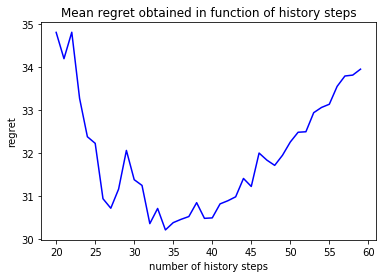

In [21]:
L = []
steps_range = list(range(20,60,1))
for nb_steps_hist_ in steps_range:
    regret = np.zeros(nb_exp)
    regrets = np.zeros((nb_exp, nb_steps))
    for i in range(nb_exp):
        env = EnvBlabla(nb_users=3, nb_trips=10, seed=i)
        agent_1 = RandomAgent(seed=i)
        agent_h = LinearRegressionAgent(seed=i)
        exp = run_exp_with_hist(agent_1, agent_h, env, nb_steps, nb_steps_hist_)
        regret[i] = exp['regret'] 
        regrets[i] = exp['cum_regrets']
    L.append(regret.mean())
    
plt.plot(steps_range, L, color='blue')
plt.title('Mean regret obtained in function of history steps')
plt.xlabel('number of history steps')
plt.ylabel('regret')
plt.show()